In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#IMPORTO ENTRONO DE TRABAJO
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#DEFINO RUTA DE TRABAJO
root_path = "/content/gdrive/MyDrive/Data science/"

In [ ]:
casos = pd.read_csv(root_path+"Covid19Casos.csv")
casos.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2022-01-12
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2022-01-12
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2022-01-12
3,10000002,F,44.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2022-01-12
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2022-01-12


In [ ]:
casos.shape

(23892105, 25)

In [ ]:
casos["clasificacion_resumen"].value_counts()

Descartado    16497108
Confirmado     6595361
Sospechoso      799636
Name: clasificacion_resumen, dtype: int64

In [ ]:
casos.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [ ]:
#ME QUEDO SOLO CON LOS CASOS POSITIVOS
indexNames = casos[casos['clasificacion_resumen'] == 'Descartado' ].index
casos.drop(indexNames , inplace=True)

indexNames = casos[casos['clasificacion_resumen'] == 'Sospechoso' ].index
casos.drop(indexNames , inplace=True)

In [ ]:
casos["clasificacion_resumen"].value_counts()

Confirmado    6595361
Name: clasificacion_resumen, dtype: int64

# Distribución de casos por sexo

In [ ]:
casos["sexo"].value_counts()

F     3357484
M     3193429
NR      44448
Name: sexo, dtype: int64

In [ ]:
total = casos["sexo"].value_counts()[0] + casos["sexo"].value_counts()[1] + casos["sexo"].value_counts()[2]
fem = casos["sexo"].value_counts()[0]
mas = casos["sexo"].value_counts()[1]
otro = casos["sexo"].value_counts()[2]

fem_porcentaje = round(fem * 100 / total, 2)
mas_porcentaje = round(mas * 100/total, 2)
otro_porcentaje = round(otro * 100/total, 2)

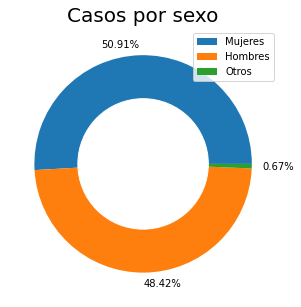

In [ ]:
x = [fem_porcentaje, mas_porcentaje, otro_porcentaje]
label = [str(fem_porcentaje) + "%", str(mas_porcentaje) + "%", str(otro_porcentaje) + "%"]
label_2 = ["Mujeres", "Hombres", "Otros"]

plt.figure(figsize=(15,5))
plt.pie(x, labels=label)
plt.title("Casos por sexo", size=20)
plt.legend(loc="upper right", frameon=True, labels=label_2)

my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Casos totales por provincia

In [ ]:
casos["residencia_provincia_nombre"].value_counts()

Buenos Aires           2516731
Córdoba                 714898
CABA                    707768
Santa Fe                561653
Tucumán                 253651
Mendoza                 198728
Entre Ríos              154767
Neuquén                 136639
Chaco                   120146
Salta                   118284
Río Negro               118208
Corrientes              107546
Santiago del Estero     103132
San Luis                 97990
Chubut                   92358
San Juan                 90156
La Pampa                 80226
Santa Cruz               73146
Formosa                  70931
Jujuy                    65647
Catamarca                63432
Misiones                 41230
La Rioja                 36998
Tierra del Fuego         36102
SIN ESPECIFICAR          34994
Name: residencia_provincia_nombre, dtype: int64

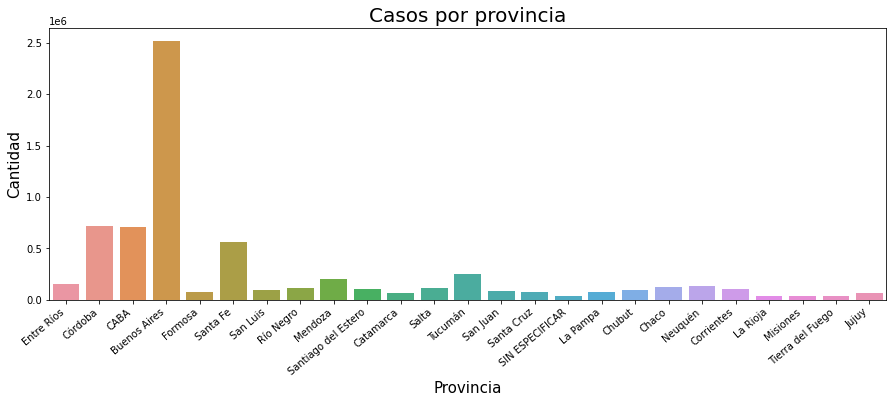

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="residencia_provincia_nombre", data=casos)
plt.title("Casos por provincia", size=20)
plt.xlabel("Provincia", size=15)
plt.ylabel("Cantidad", size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Casos totales por día y mes (2020 - 2021 - 2022)

In [ ]:
casos["fecha_apertura"] = pd.to_datetime(casos["fecha_apertura"])

In [ ]:
casos['mes'] = casos['fecha_apertura'].dt.month

casos['año'] = casos['fecha_apertura'].dt.year

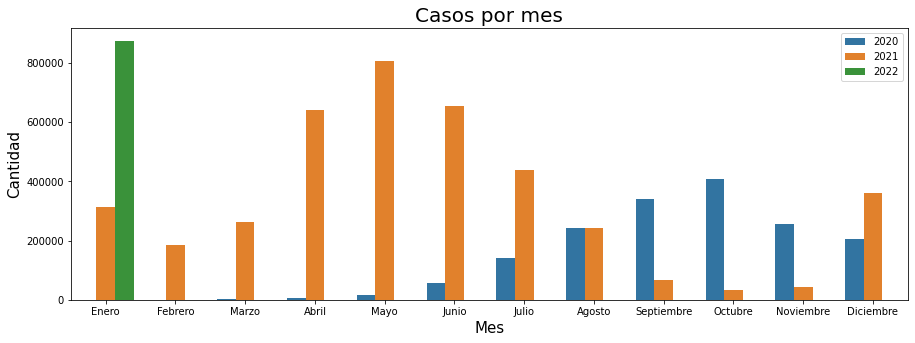

In [ ]:
labels_año = [2020, 2021, 2022]
labels_mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

plt.figure(figsize=(15,5))
ax  = sns.countplot(data=casos , x="mes", hue="año")
ax.set_xticklabels(labels = labels_mes)
plt.title("Casos por mes", size=20)
plt.xlabel("Mes", size=15)
plt.ylabel("Cantidad", size=15)
plt.legend(loc="upper right", frameon=True, labels=labels_año)
plt.show()

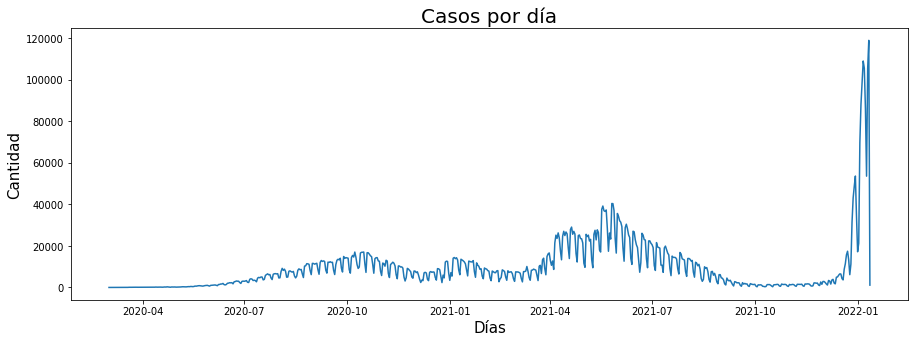

In [ ]:
y = casos["fecha_apertura"].value_counts()
x = y.index

plt.figure(figsize=(15,5))
sns.lineplot(x=x, y=y)
plt.title("Casos por día", size=20)
plt.xlabel("Días", size=15)
plt.ylabel("Cantidad", size=15)
plt.show()

# Testeos por día

In [ ]:
casos_totales = pd.read_csv(root_path+"Covid19Casos.csv")
casos_totales.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2022-01-12
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2022-01-12
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2022-01-12
3,10000002,F,44.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2022-01-12
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,14,NaN,NO,NaN,NO,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2022-01-12


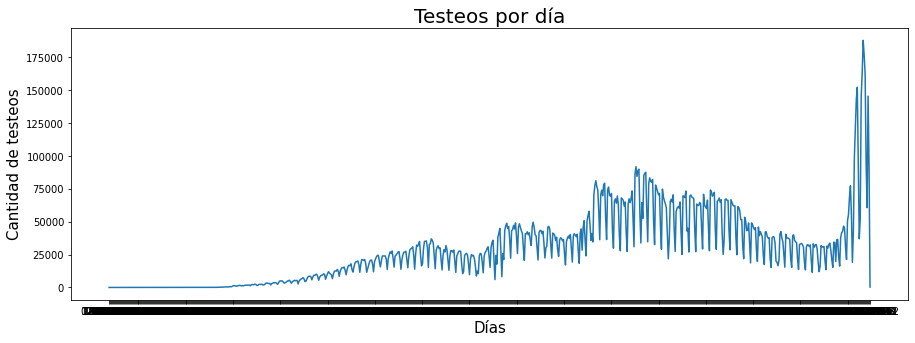

In [ ]:
y=casos_totales["fecha_diagnostico"].value_counts()
x=y.index

plt.figure(figsize=(15,5))
sns.lineplot(x=x, y=y)
plt.title("Testeos por día", size=20)
plt.xlabel("Días", size=15)
plt.ylabel("Cantidad de testeos", size=15)
plt.show()